In [1]:
import pandas as pd
import numpy as np

movies_df=pd.read_csv("C:/Users/pfali/Downloads/tmdb_movies.csv")

movies_df.head()

,Unnamed: 0,budget,homepage,id,original_language,original_title,overview,popularity,release_date,revenue,runtime,status,tagline,title,vote_average,vote_count,genre_id
0,0,237000000,http://www.avatarmovie.com/,19995,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,2009-12-10,2787965087,162.0,Released,Enter the World of Pandora.,Avatar,7.2,11800,28.0
1,1,300000000,http://disney.go.com/disneypictures/pirates/,285,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,2007-05-19,961000000,169.0,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,12.0
2,2,245000000,http://www.sonypictures.com/movies/spectre/,206647,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,2015-10-26,880674609,148.0,Released,A Plan No One Escapes,Spectre,6.3,4466,28.0
3,3,250000000,http://www.thedarkknightrises.com/,49026,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,2012-07-16,1084939099,165.0,Released,The Legend Ends,The Dark Knight Rises,7.6,9106,28.0
4,4,260000000,http://movies.disney.com/john-carter,49529,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,2012-03-07,284139100,132.0,Released,"Lost in our world, found in another.",John Carter,6.1,2124,28.0


In [2]:
movies_df['quartile']=pd.qcut(movies_df['vote_count'],4,labels=False)
f=movies_df.loc[movies_df['quartile']>2].index
filter=f.values.tolist()
bm=movies_df[['title','vote_average']].iloc[filter]
bm.reset_index(inplace=True)
f_bm=bm['vote_average'].nlargest(n=10).index
filter_bm=f_bm.values.tolist()
print(filter_bm)
best_movies=bm.iloc[filter_bm]
best_movies_list=best_movies[['title','vote_average']].values.tolist()
print(best_movies_list)

[863, 1098, 461, 842, 928, 1011, 1083, 1149, 65, 471]
[['The Shawshank Redemption', 8.5], ['The Godfather', 8.4], ['Fight Club', 8.3], ["Schindler's List", 8.3], ['Spirited Away', 8.3], ['The Godfather: Part II', 8.3], ['Pulp Fiction', 8.3], ['Whiplash', 8.3], ['The Dark Knight', 8.2], ['The Green Mile', 8.2]]


In [3]:
movies_df['release_date']=pd.to_datetime(movies_df['release_date'])
yf=movies_df.loc[(movies_df['release_date']>"2009-12-31")&(movies_df['release_date']<"2017-01-01")].index
year_filter=yf.values.tolist()
br=movies_df.iloc[year_filter]
br_grouped=br[['release_date','budget','revenue']].groupby(pd.Grouper(key='release_date',freq='Y')).mean().reset_index()

br_grouped

,release_date,budget,revenue
0,2010-12-31,3.449541e+07,9.043811e+07
1,2011-12-31,3.477232e+07,9.200413e+07
2,2012-12-31,3.492203e+07,1.160659e+08
3,2013-12-31,3.552329e+07,1.013485e+08
4,2014-12-31,3.095989e+07,1.013466e+08
5,2015-12-31,3.113216e+07,1.054399e+08
6,2016-12-31,4.570327e+07,1.390496e+08


In [4]:
def million(x,pos):
    return '{:4.1f}M'.format(x*1e-6)

<function matplotlib.pyplot.show(close=None, block=None)>

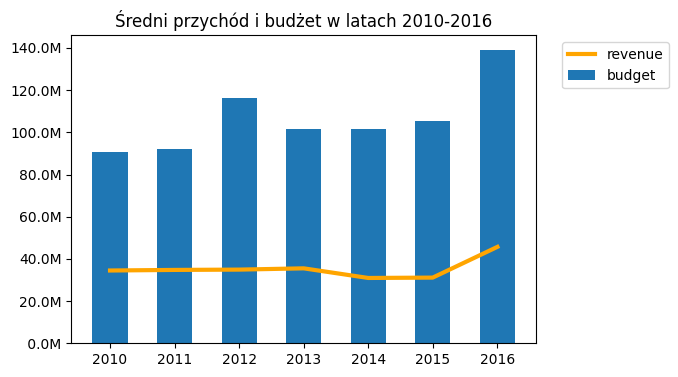

In [5]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(figsize=(6,4))
ax.bar(br_grouped['release_date'],br_grouped['revenue'],width=200,label="budget")
ax.set_xticks(br_grouped['release_date'],labels=['2010','2011','2012','2013','2014','2015','2016'])
ax.plot(br_grouped['release_date'],br_grouped['budget'],linewidth=3.0,color='orange',label="revenue")
formatter=plt.FuncFormatter(million)
ax.yaxis.set_major_formatter(formatter)
ax.set_title('Średni przychód i budżet w latach 2010-2016', loc='center')
ax.legend(bbox_to_anchor=(1.3, 1.0),loc='upper right')
plt.show


In [6]:
genres_df=pd.read_csv("C:/Users/pfali/Downloads/tmdb_genres.csv")
genres_df.rename(columns={"Unnamed: 0":"genre_id"},inplace=True)

In [19]:
movies_genres=pd.merge(movies_df,genres_df,on='genre_id',how='left')
df2=movies_genres.pivot_table(values='title',index='genres',aggfunc=pd.Series.nunique).reset_index()
sorted=df2.sort_values(by=['title'],ascending=False)
sorted
print("W bazie najczęściej pojawiają się filmy z gatunku {}. Jest ich {}.".format(sorted['genres'][6],sorted['title'][6]))

W bazie najczęściej pojawiają się filmy z gatunku Drama. Jest ich 1206.


In [28]:
avg_time=movies_genres.pivot_table(values='runtime',index='genres',aggfunc="mean").reset_index()
avg_time_sorted=avg_time.sort_values(by=['runtime'],ascending=False)
avg_time_sorted
print("Średnio najdłużej trwają filmy z gatunku {}.".format(avg_time_sorted['genres'][10]))

Średnio najdłużej trwają filmy z gatunku History.


In [50]:
history=movies_genres.loc[movies_genres['genres'].eq('History')]
history_runtime=history.pivot_table(values='runtime',index='title',aggfunc=np.mean).reset_index()
history_runtime

,title,runtime
0,Bobby,120.0
1,Butch Cassidy and the Sundance Kid,110.0
2,Censored Voices,84.0
3,Evita,134.0
4,For Greater Glory - The True Story of Cristiada,145.0
5,Ghosts of Mississippi,130.0
6,Goodbye Bafana,140.0
7,In the Valley of Elah,124.0
8,Inside Deep Throat,92.0
9,Lincoln,149.0


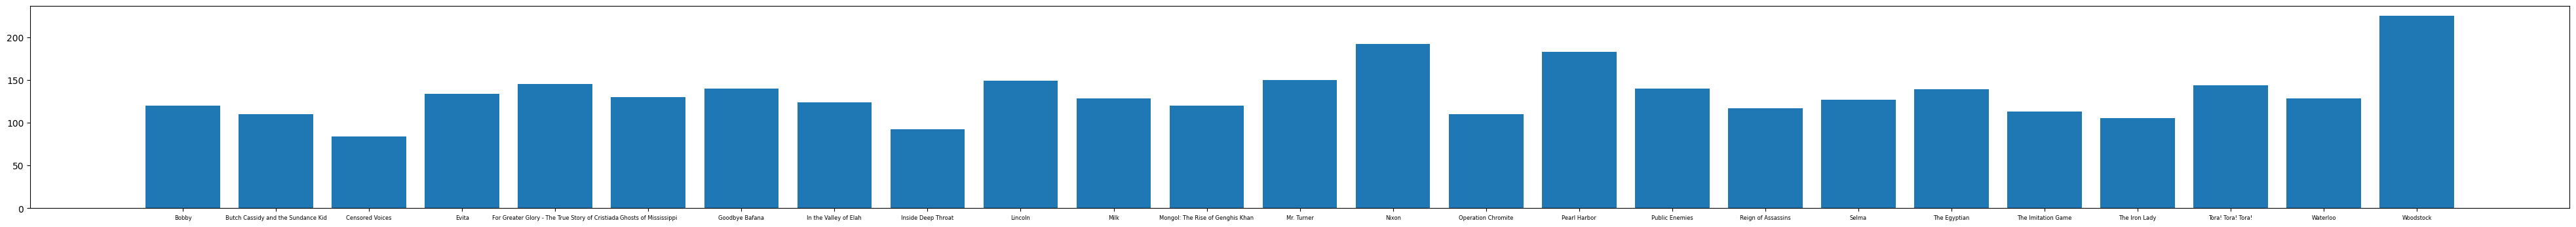

In [87]:
fig,ax=plt.subplots(figsize=(50,4))
ax.bar(history_runtime['title'],history_runtime['runtime'])
plt.xticks(fontsize=6)
ax.set_xticks(history_runtime['title'])
plt.show()